In [1]:
import pypulseq as pp
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt

In [2]:
seq = pp.Sequence()
seq.read('/Users/danielmiksch/JupyterLab/optim/seq_init/simple_gauss.seq')

block_events = seq.block_events

print(f"Typ von block_events: {type(block_events)}")
print(f"Anzahl der Blöcke: {len(block_events)}")

# Beispielhafte Ausgabe der ersten paar Blöcke
i = 0
for key, value in block_events.items():
    i += 1
    if i < 4:
        print(f"Block {key}: {value}")
    else: break

defs = seq.definitions
defs

Typ von block_events: <class 'dict'>
Anzahl der Blöcke: 2
Block 1: [0 1 0 0 0 0 0]
Block 2: [0 0 0 0 0 1 0]


{'AdcRasterTime': 1e-07,
 'B0': 17.0,
 'BlockDurationRaster': 1e-05,
 'FREQ': 723.7988,
 'GradientRasterTime': 1e-05,
 'M0_offset': 0.0,
 'RadiofrequencyRasterTime': 1e-06,
 'TotalDuration': 0.011,
 'a': 90.0,
 'num_meas': 1.0,
 'offsets_ppm': 0.0,
 'seq_id_string': 'simple_gauss'}

In [3]:
# loop_block_events = tqdm(range(1, len(block_events) + 1))
# for block_event in range(1, 2):
#     block = seq.get_block(block_event)
    

# print(f"Typ von block: {type(block)}")
# vars(block)
# torch.from_numpy(np.angle(block.rf.signal))
# block.rf.freq_offset
events = seq.block_events
events

{1: array([0, 1, 0, 0, 0, 0, 0]), 2: array([0, 0, 0, 0, 0, 1, 0])}

In [4]:
np.angle(0+1j)

1.5707963267948966

In [5]:
import copy
from pathlib import Path
from typing import Tuple, Union

import numpy as np
import yaml

from bmc.params import Params

In [6]:
def load_config(*args: Union[str, Path]) -> dict:
    """
    load_config Load the config file(s) for given path(s) and return the data as a dictionary.

    Returns
    -------
    dict
        Dictionary containing the data from the config file(s).
    """
    config = {}
    for filepath in args:
        with open(filepath, "r") as file:
            config.update(yaml.load(file, Loader=yaml.Loader))
    return config

In [7]:
load_config('/Users/danielmiksch/miniconda3/envs/simu/lib/python3.11/site-packages/bmctool/library/sim-library/config_wasabi.yaml')

{'water_pool': {'f': 1, 'r1': '1 / 1.3', 'r2': '1 / 75e-3'},
 'b0': 3,
 'gamma': 267.5153,
 'b0_inhom': 0.0,
 'rel_b1': 1,
 'verbose': False,
 'reset_init_mag': True,
 'scale': 0.5,
 'max_pulse_samples': 300}

In [8]:
A = 1.0        # Amplitude
T = 0.1        # Gesamtdauer des Pulses (in Sekunden)
fs = 100      # Abtastfrequenz (in Hz)
sigma = 0.001    # Standardabweichung
t0 = T / 2

t = np.linspace(0, T, int(fs*T))

# Gauß-Puls berechnen
gauss_pulse = A * np.exp(-((t - t0) ** 2) / (2 * sigma ** 2))

# Gauß-Puls plotten
# plt.plot(t, gauss_pulse)
# plt.title('Gauß-Puls')
# plt.xlabel('Zeit (s)')
# plt.ylabel('Amplitude')
# plt.show()

In [9]:
for i in range(1, 2):
    print(i)

1


## Pulse Gradient sequence

In [10]:
seq = pp.Sequence()
seq.read('/Users/danielmiksch/JupyterLab/optim/seq_init/simple_gauss_gradient.seq')

block_events = seq.block_events

print(f"Typ von block_events: {type(block_events)}")
print(f"Anzahl der Blöcke: {len(block_events)}")

# Beispielhafte Ausgabe der ersten paar Blöcke
i = 0
for key, value in block_events.items():
    i += 1
    if i < 4:
        print(f"Block {key}: {value}")
    else: break

Typ von block_events: <class 'dict'>
Anzahl der Blöcke: 4
Block 1: [0 1 0 0 0 0 0]
Block 2: [0 0 0 0 1 0 0]
Block 3: [0 1 0 0 0 0 0]


In [11]:
loop_block_events = tqdm(range(1, len(block_events) + 1))
for block_event in range(1, 3):
    block = seq.get_block(block_event)
    

print(f"Typ von block: {type(block)}")
(block.gz.tt[1] - block.gz.tt[0]) * len(block.gz.tt)

  0%|          | 0/4 [00:00<?, ?it/s]

Typ von block: <class 'types.SimpleNamespace'>


0.5000000000000001

In [12]:
loop_block_events = tqdm(range(1, len(block_events) + 1))
for block_event in range(1, 2):
    block = seq.get_block(block_event)
    

print(f"Typ von block: {type(block)}")
(block.rf.t[1]-block.rf.t[0]) * len(block.rf.t)
block.rf.phase_offset

  0%|          | 0/4 [00:00<?, ?it/s]

Typ von block: <class 'types.SimpleNamespace'>


0.0

In [13]:
300 * 3.4000000000000007e-05

0.010200000000000002

In [16]:
mag = np.zeros([6, 6])
mag = mag[np.newaxis, np.newaxis,]
mag.shape

(1, 1, 6, 6)

In [82]:
mag = np.zeros([2, 2 ,6, 6])

In [83]:
mag

array([[[[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]]]])

In [88]:
pos = np.array([-1, 2])
pos = pos.reshape(2, 1)
pos.shape

(2, 1)

In [89]:
mag[:, :, 0, 2] +=pos
mag[:, :, 2, 0] -= pos

In [90]:
mag

array([[[[ 0.,  0., -1.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 1.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.]],

        [[ 0.,  0., -1.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 1.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  2.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [-2.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  2.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [-2.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.]]]])

In [127]:
vec = np.arange(0, 30, 1, dtype=np.float64)
vec = vec.reshape(2, 3, 5)
vec

array([[[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.]],

       [[15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.]]])

In [131]:
vec_x = vec[:, 0, :]
vec_y = vec[:, 1, :]
vec_z = vec[:, 2, :]

In [133]:
vec_x_total = np.sum(vec_x, axis=0)
vec_x_total /= np.max(np.abs(vec_x_total)) if np.max(np.abs(vec_x_total)) != 0 else 1
vec_y_total = np.sum(vec_y, axis=0)
vec_y_total /= np.max(np.abs(vec_y_total)) if np.max(np.abs(vec_y_total)) != 0 else 1
vec_z_total = np.sum(vec_z, axis=0)
vec_z_total /= np.max(np.abs(vec_z_total)) if np.max(np.abs(vec_z_total)) != 0 else 1

print(vec_x_total)
print(vec_y_total)
print(vec_z_total)

[0.65217391 0.73913043 0.82608696 0.91304348 1.        ]
[0.75757576 0.81818182 0.87878788 0.93939394 1.        ]
[0.81395349 0.86046512 0.90697674 0.95348837 1.        ]


In [134]:
vec_trans = vec_x + 1j * vec_y

In [135]:
np.abs(vec_trans)

array([[ 5.        ,  6.08276253,  7.28010989,  8.54400375,  9.8488578 ],
       [25.        , 26.40075756, 27.80287755, 29.20616373, 30.61045573]])

In [136]:
for i in [5,6]:
    print(i)

5
6


In [139]:
test = np.arange(0, 11, 1)

In [144]:
test = np.append(test, 0)

In [153]:
import torch

In [161]:
a = torch.tensor([1, 2, 3], dtype=torch.float64)
b = torch.tensor([4, 5, 6], dtype=torch.float64)
a.size()

torch.Size([3])

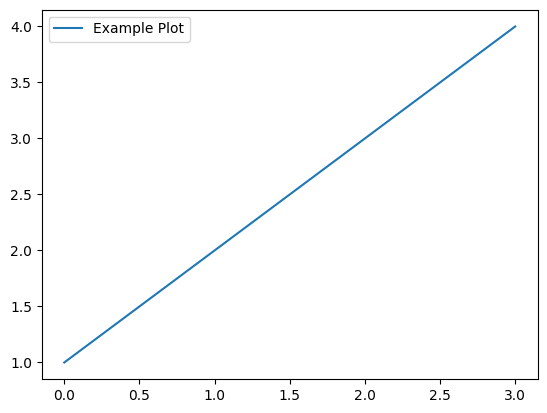

In [4]:
import torch
import matplotlib.pyplot as plt

# Tensor auf der GPU
tensor_gpu = torch.tensor([1.0, 2.0, 3.0, 4.0], device='cuda')

# Tensor auf die CPU verschieben und in NumPy-Array umwandeln
tensor_cpu = tensor_gpu.cpu()

# Plotten mit Matplotlib
plt.plot(tensor_cpu, label='Example Plot')
plt.legend()
plt.show()

In [188]:
import torch
len(torch.tensor([1, 2, 3], dtype=torch.float64))

3